<a href="https://colab.research.google.com/github/Seal-Trainer/problemaClasificaci-nBinaria/blob/master/problemaClasificacionBinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# La libreria numpy para el procesamiento numerico
import numpy as np
# La libreria scipy que expande las utilidades de numpy
import scipy as sc
# La libreria plt sirve para graficar
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

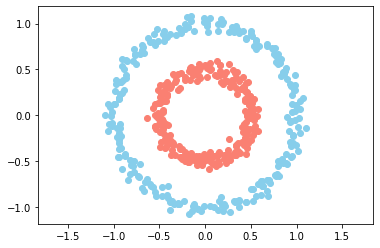

In [ ]:
# Para ver la documentación de la
# función make_circles solo hay que añadirle parentesis
# así make_circles() o poner el mouse sobre la función
make_circles()
# ¿Cómo crear el conjunto de datos (dataset)?
# Proceso de creación del dataset

# n = número de datos.
n = 500
# p = número de caracteristicas.
p = 2

# factor es la distancia entre los dos círculos
# noise es la variabilidad de los puntos, puedes probar 
# esto removiendo el argumento noise.
X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

# Lo que trateremos de lograr es que
# nuestra red neuronal aprenda a separar
# estas dos clases.

In [ ]:
#Clase de la capa de la red
class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

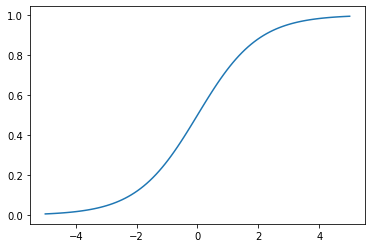

In [ ]:
# Creación de la función de activación
# Estas nos permite añadir no-linearidades
# Crearemos la función de activación sigmoide

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)

# Corriendo este código vamos a graficar la 
# función de activación sigmoide.
plt.plot(_x, sigm[0](_x))


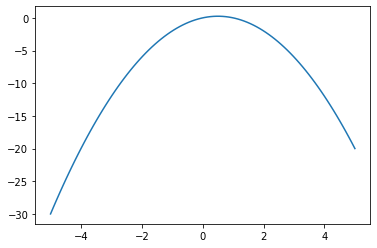

In [ ]:
# Este código nos permite observar la derivada 
# función sigmoide.
plt.plot(_x, sigm[1](_x))

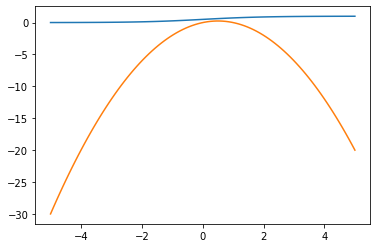

In [ ]:
# Combinadolas
plt.plot(_x, sigm[0](_x))
plt.plot(_x, sigm[1](_x))
# Nos proporciona la pendiente 
# de la derivada de la función sigmoide.

In [ ]:
# Función que nos permite crear
# la red neuronal de manera automática.
def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn
# topology = Número de neuronas que utilizamos en cada cada.
# En la última capa tenemos solamente una neurona
# La razón de esto es porque el resultado a calcular
# es binario, 0 o 1.
topology = [p, 4, 8, 1]
create_nn(topology, sigm)

# Hasta este punto solo creamos la red neuronal, 
# todavía no le pasamos los algoritmos que la harán
# funcionar.

In [ ]:
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)
# Función de costo 
# Error Cuadratico Medio

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) **2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr = 0.15, train = True):
  out = [(None, X)]
  # Forward pass
  for l, layer in enumerate(neural_net):
    # Z es la suma ponderada
    z =  out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))
  # Una vez que obtenemos el error, lo que haremos 
  # es aplicar el algoritmo de backpropagation
    
    
  if train:
    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1:
        # Calcular delta última capa.
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))          
      else:
        # Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr    
  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

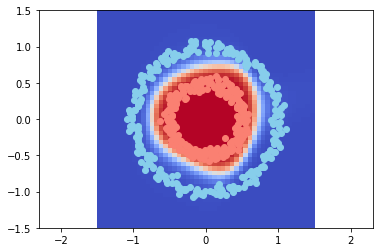

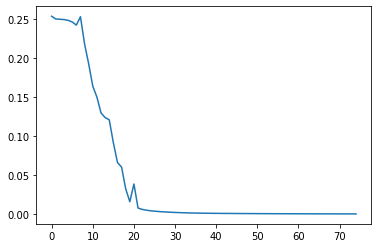

In [ ]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)
loss = []

for i in range(2500):
  #Entrenamiento iterativo de la red
  pY = train(neural_n, X, Y, l2_cost, lr = 0.05)

  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([x0, x1]), Y, l2_cost, train = False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0 ]== 0, 0], X[Y[:,0 ]== 0, 1], c = "skyblue")
    plt.scatter(X[Y[:,0 ]== 1, 0], X[Y[:,0 ]== 1, 1], c = "salmon")

    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)

![alt text](https://)